In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('C:/Users/admin/Intern/DataSets/bank-full.csv', sep=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.shape

(45211, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [10]:
df = df.drop('duration', axis=1)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [12]:
cols = df.select_dtypes(include=['object']).columns

In [13]:
encoder = LabelEncoder()

for col in cols:
    df[col] = encoder.fit_transform(df[col])

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3,0


In [15]:
X = df.drop('y', axis=1	)
y = df['y']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31647, 15), (13564, 15), (31647,), (13564,))

In [18]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [19]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [13:02:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [20]:
prev_accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {prev_accuracy}')

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred)) 

Accuracy: 0.893320554408729
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11977
           1       0.60      0.26      0.36      1587

    accuracy                           0.89     13564
   macro avg       0.76      0.62      0.65     13564
weighted avg       0.87      0.89      0.87     13564

[[11709   268]
 [ 1179   408]]


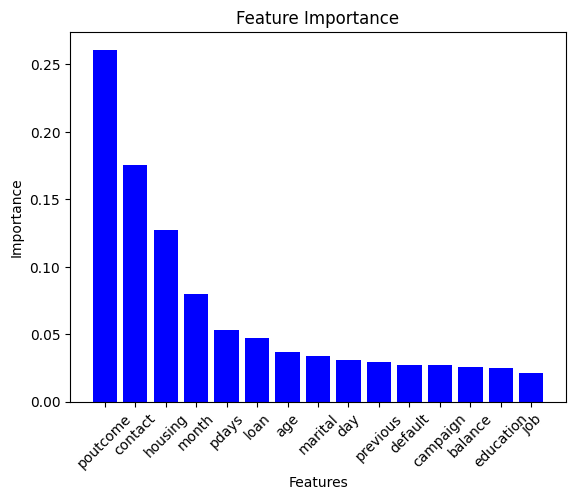

In [21]:
importance = xgb.feature_importances_
index = np.argsort(importance)[::-1]

plt.Figure(figsize=(10, 6))

plt.bar(range(X_train.shape[1]), importance[index], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[index], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [22]:
parameters = {
    'n_estimators': [50, 100, 200],
	'max_depth': [3, 5, 7],
	'learning_rate': [0.01, 0.1, 0.2],
	'subsample': [0.5, 0.8, 1.0]
}

In [23]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(xgb, parameters, cv=5, n_jobs=-1)

In [24]:
grid.fit(X_train, y_train)

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [13:02:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], 'subsample': [0.5, 0.8, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [25]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

In [26]:
best_xgb = grid.best_estimator_

In [27]:
y_pred_best = best_xgb.predict(X_test)

In [28]:
print("Previous accuracy", prev_accuracy)
print("Improved accuracy", accuracy_score(y_test, y_pred_best))

Previous accuracy 0.893320554408729
Improved accuracy 0.8949424948392805


In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,1,-1,0,3,0


In [33]:
sample = pd.DataFrame([{
	'age': 44,
	'job': 9,
	'marital': 2,
	'education': 1,
	'default': 0,
	'balance': 29,
	'housing': 1,
	'loan': 0,
	'contact': 2,
	'day': 2,
	'month': 5,
	'campaign': 1,
	'pdays': 0,
	'previous': 0,
	'poutcome': 0
}])

In [34]:
best_xgb.predict(sample)

array([0])